In [1]:
import re
import re
import os
from nltk.tokenize import TreebankWordTokenizer
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Data Loading

In [2]:
file_path = 'pg766.txt' 
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read()
print(data[:1000])


The Project Gutenberg eBook of David Copperfield
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: David Copperfield

Author: Charles Dickens

Release date: December 1, 1996 [eBook #766]
                Most recently updated: July 11, 2024

Language: English

Original publication: , 1869

Credits: Credits: Jo Churcher and David Widger


*** START OF THE PROJECT GUTENBERG EBOOK DAVID COPPERFIELD ***




DAVID COPPERFIELD


By Charles Dickens




               AFFECTIONATELY INSCRIBED
                             TO
               THE HON. Mr. AND Mrs. RICHARD WATSON,
                   


In [3]:
# Function to remove the Project Gutenberg headers and footers
def remove_gutenberg_boilerplate(text):
    # Define start and end markers
    start_marker = r"\*\*\* START OF THE PROJECT GUTENBERG EBOOK.*?\*\*\*"
    end_marker = r"\*\*\* END OF THE PROJECT GUTENBERG EBOOK.*?\*\*\*"
    
    # Find the positions of the markers
    start_match = re.search(start_marker, text, re.IGNORECASE | re.DOTALL)
    end_match = re.search(end_marker, text, re.IGNORECASE | re.DOTALL)
    
    # If both markers are found, extract the text between them
    if start_match and end_match:
        clean_text = text[start_match.end():end_match.start()]
    else:
        # If markers not found, assume no boilerplate and return the text as-is
        clean_text = text
    
    return clean_text.strip()

# Assuming 'data' contains the full text from the file
clean_data = remove_gutenberg_boilerplate(data)

# Optionally, print the first 1000 characters of the cleaned text to check
print(clean_data[:1000])


DAVID COPPERFIELD


By Charles Dickens




               AFFECTIONATELY INSCRIBED
                             TO
               THE HON. Mr. AND Mrs. RICHARD WATSON,
                             OF
               ROCKINGHAM, NORTHAMPTONSHIRE.




CONTENTS


     I.      I Am Born
     II.     I Observe
     III.    I Have a Change
     IV.     I Fall into Disgrace
     V.      I Am Sent Away
     VI.     I Enlarge My Circle of Acquaintance
     VII.    My ‘First Half’ at Salem House
     VIII.   My Holidays.  Especially One Happy Afternoon
     IX.     I Have a Memorable Birthday
     X.      I Become Neglected, and Am Provided For
     XI.     I Begin Life on My Own Account, and Don’t Like It
     XII.    Liking Life on My Own Account No Better, I Form a Great Resolution
     XIII.   The Sequel of My Resolution
     XIV.    My Aunt Makes up Her Mind About Me
     XV.     I Make Another Beginning
     XVI.    I Am a New Boy in More Senses Than One
     XVII.   Somebody Turns Up
     

## Data Statistics [Raw]

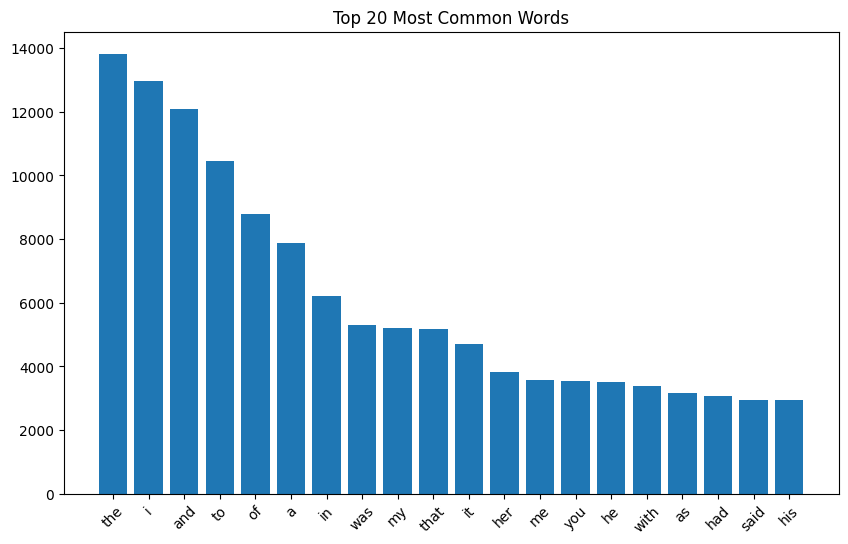

In [4]:
# Tokenize the text using TreebankWordTokenizer
def clean_and_tokenize(text):
    text = text.lower()  # Lowercase the text
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokenizer = TreebankWordTokenizer()  # Alternative tokenizer
    tokens = tokenizer.tokenize(text)
    return tokens

# Assuming 'data' is already loaded with the text file content
tokens = clean_and_tokenize(data)

# Count word frequencies
word_freq = Counter(tokens)

# Get the 20 most common words
most_common_words = word_freq.most_common(20)

# Plotting the word frequency distribution
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()


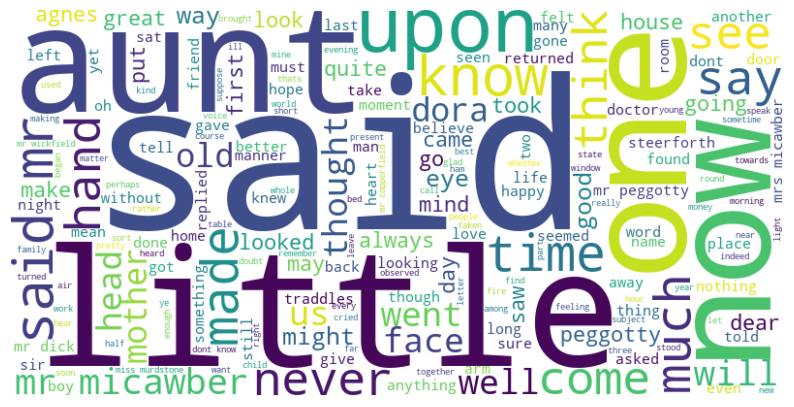

In [5]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [6]:
# Text length statistics
total_words = len(tokens)
unique_words = len(set(tokens))

print(f'Total words: {total_words}')
print(f'Unique words: {unique_words}')

Total words: 357844
Unique words: 17066


In [1]:
import re

# Read the raw data
with open('pg766.txt', 'r', encoding='utf-8') as file:
    data = file.read()

# Tokenize the text to extract words
tokens = re.findall(r'\b\w+\b', data)

# Calculate total number of words
total_words = len(tokens)
print(f"Total Words: {total_words}")


Total Words: 367022


In [2]:
# Calculate the length of each word
word_lengths = [len(word) for word in tokens]

# Compute the average word length
average_word_length = sum(word_lengths) / len(word_lengths)
print(f"Average Word Length: {average_word_length:.2f} characters")


Average Word Length: 4.07 characters


In [3]:
import re

# Split the text into sentences using punctuation marks as delimiters
sentences = re.split(r'[.!?]+', data)

# Remove any empty strings from the list
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

# Calculate the number of words in each sentence
sentence_lengths = [len(re.findall(r'\b\w+\b', sentence)) for sentence in sentences]

# Calculate total number of sentences
total_sentences = len(sentence_lengths)

# Calculate average sentence length
average_sentence_length = sum(sentence_lengths) / total_sentences

# Find minimum and maximum sentence lengths
min_sentence_length = min(sentence_lengths)
max_sentence_length = max(sentence_lengths)

print(f"Total Sentences: {total_sentences}")
print(f"Average Sentence Length: {average_sentence_length:.2f} words")
print(f"Sentence Length Range: {min_sentence_length} to {max_sentence_length} words")


Total Sentences: 23144
Average Sentence Length: 15.86 words
Sentence Length Range: 1 to 233 words


In [4]:
from collections import Counter

# Assuming 'tokens' is a list of words from your dataset
# If you haven't already tokenized your data, you can do so using:
# tokens = re.findall(r'\b\w+\b', data.lower())

# Calculate word frequencies
word_counts = Counter(tokens)

# List of specific words to get counts for
words_to_count = ['the', 'and', 'to', 'a', 'of', 'was', 'he', 'in', 'that', 'it']

# Get counts for the specified words
print("Top 10 Most Common Words:")
for word in words_to_count:
    count = word_counts.get(word, 0)
    print(f"{word}: {count}")


Top 10 Most Common Words:
the: 13179
and: 11952
to: 10410
a: 7829
of: 8732
was: 5298
he: 2919
in: 6114
that: 5154
it: 4288


# Data Pre-Processing

In [7]:
# Convert the cleaned text to lowercase
clean_data = clean_data.lower()

# Remove punctuation and non-alphabetic characters
clean_data = re.sub(r'[^a-z\s]', '', clean_data)

# Optionally, print the first 1000 characters of the cleaned text to check
print(clean_data[:1000])


david copperfield


by charles dickens




               affectionately inscribed
                             to
               the hon mr and mrs richard watson
                             of
               rockingham northamptonshire




contents


     i      i am born
     ii     i observe
     iii    i have a change
     iv     i fall into disgrace
     v      i am sent away
     vi     i enlarge my circle of acquaintance
     vii    my first half at salem house
     viii   my holidays  especially one happy afternoon
     ix     i have a memorable birthday
     x      i become neglected and am provided for
     xi     i begin life on my own account and dont like it
     xii    liking life on my own account no better i form a great resolution
     xiii   the sequel of my resolution
     xiv    my aunt makes up her mind about me
     xv     i make another beginning
     xvi    i am a new boy in more senses than one
     xvii   somebody turns up
     xviii  a retrospect
     xix  

In [8]:
# Load spaCy's small English model
nlp = spacy.load('en_core_web_sm')

# Increase the max length limit to handle larger text
nlp.max_length = len(clean_data) + 100000

# Step 1: Process the cleaned data using spaCy
doc = nlp(clean_data)

# Step 2: Tokenize and filter out empty or whitespace tokens
tokens = [token.text for token in doc if not token.is_space]

# Optionally, check the first 50 tokens
print(tokens[:50])


['david', 'copperfield', 'by', 'charles', 'dickens', 'affectionately', 'inscribed', 'to', 'the', 'hon', 'mr', 'and', 'mrs', 'richard', 'watson', 'of', 'rockingham', 'northamptonshire', 'contents', 'i', 'i', 'am', 'born', 'ii', 'i', 'observe', 'iii', 'i', 'have', 'a', 'change', 'iv', 'i', 'fall', 'into', 'disgrace', 'v', 'i', 'am', 'sent', 'away', 'vi', 'i', 'enlarge', 'my', 'circle', 'of', 'acquaintance', 'vii', 'my']


## Remove Meta-Data

In [9]:
# Define a function to remove chapter titles and other unwanted metadata
def remove_metadata(tokens):
    cleaned_tokens = []
    for token in tokens:
        # Skip tokens that are Roman numerals or "contents"
        if re.match(r'^[IVXLCDM]+$', token.upper()) or token.lower() == 'contents':
            continue
        cleaned_tokens.append(token)
    return cleaned_tokens

# Apply the function to the tokens
cleaned_tokens = remove_metadata(tokens)

# Optionally, check the first 50 cleaned tokens
print(cleaned_tokens[:50])


['david', 'copperfield', 'by', 'charles', 'dickens', 'affectionately', 'inscribed', 'to', 'the', 'hon', 'mr', 'and', 'mrs', 'richard', 'watson', 'of', 'rockingham', 'northamptonshire', 'am', 'born', 'observe', 'have', 'a', 'change', 'fall', 'into', 'disgrace', 'am', 'sent', 'away', 'enlarge', 'my', 'circle', 'of', 'acquaintance', 'my', 'first', 'half', 'at', 'salem', 'house', 'my', 'holidays', 'especially', 'one', 'happy', 'afternoon', 'have', 'a', 'memorable']


In [10]:
# Define the folder path
output_folder = 'cleaned_data'

# Create the folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Save the cleaned tokens to a file
tokens_file_path = os.path.join(output_folder, 'cleaned_tokens.txt')
with open(tokens_file_path, 'w', encoding='utf-8') as f:
    for token in cleaned_tokens:
        f.write(f"{token}\n")

# Save the cleaned text to a file
text_file_path = os.path.join(output_folder, 'cleaned_text.txt')
cleaned_text = ' '.join(cleaned_tokens)
with open(text_file_path, 'w', encoding='utf-8') as f:
    f.write(cleaned_text)

# Confirm the files were saved
print(f"Files saved to {output_folder}:")
print(f"- Cleaned tokens: {tokens_file_path}")
print(f"- Cleaned text: {text_file_path}")


Files saved to cleaned_data:
- Cleaned tokens: cleaned_data\cleaned_tokens.txt
- Cleaned text: cleaned_data\cleaned_text.txt


## Statistics

In [11]:
# Total word count
total_words = len(cleaned_tokens)

# Unique word count
unique_words = len(set(cleaned_tokens))

print(f"Total words: {total_words}")
print(f"Unique words: {unique_words}")

Total words: 342562
Unique words: 16748


In [12]:
# Count the frequency of each word
word_freq = Counter(cleaned_tokens)

# Get the 20 most common words
most_common_words = word_freq.most_common(20)

# Display the most common words
print("Top 20 most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Top 20 most common words:
the: 13642
and: 12016
to: 10383
of: 8650
a: 7807
in: 6160
was: 5307
that: 5303
my: 5195
it: 4688
her: 3833
you: 3626
he: 3576
me: 3565
with: 3347
as: 3156
had: 3080
said: 2941
his: 2928
she: 2719


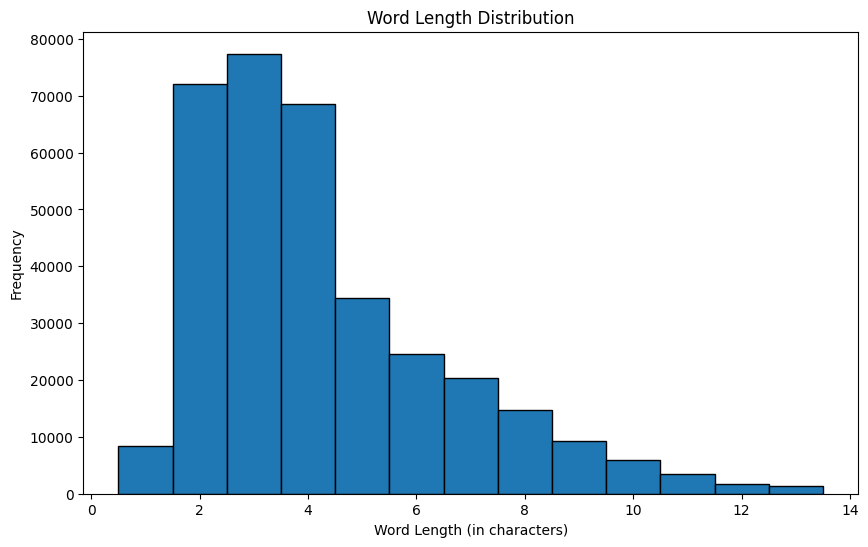

In [13]:
# Calculate the length of each word
word_lengths = [len(word) for word in cleaned_tokens]

# Plot word length distribution
plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=range(1, 15), edgecolor='black', align='left')
plt.title('Word Length Distribution')
plt.xlabel('Word Length (in characters)')
plt.ylabel('Frequency')
plt.show()


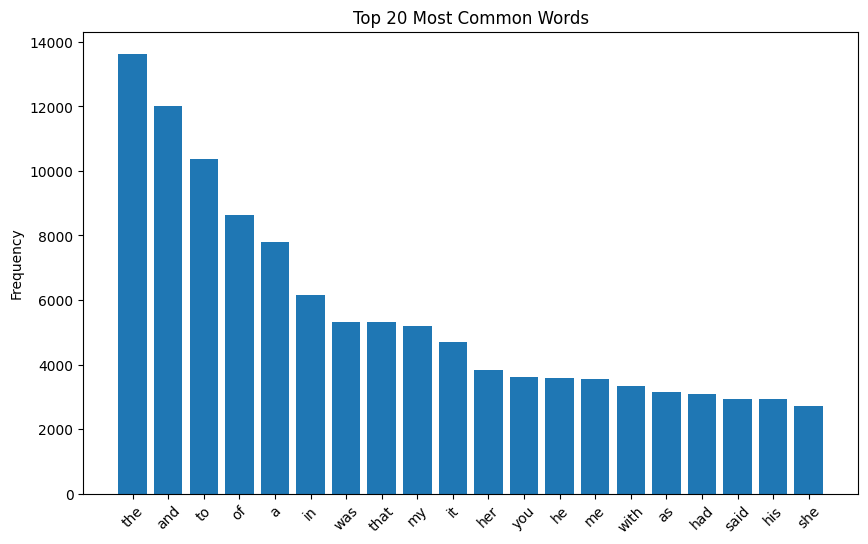

In [15]:
# Plot the top 20 most frequent words
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()


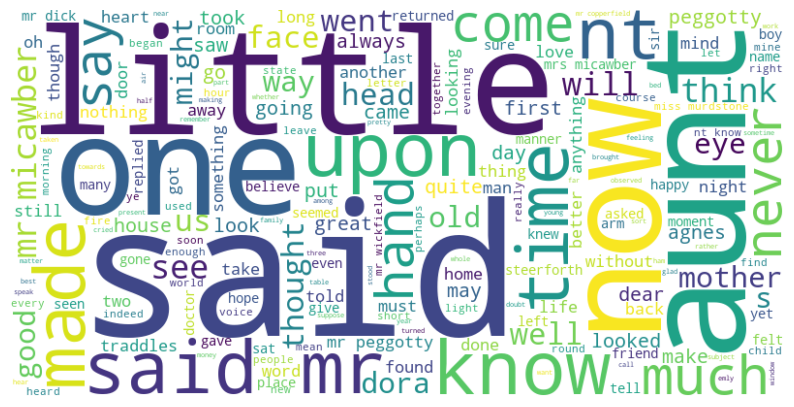

In [16]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_tokens))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Sequence Preperation

In [17]:
def create_sequences(tokens, sequence_length):
    sequences = []
    for i in range(sequence_length, len(tokens)):
        # Input sequence: n previous words
        seq = tokens[i-sequence_length:i]
        # Output: the next word
        target = tokens[i]
        sequences.append((seq, target))
    return sequences

# Define the length of your sequences (e.g., 3 for trigrams)
sequence_length = 3

# Create sequences
sequences = create_sequences(cleaned_tokens, sequence_length)

# Check the first 5 sequences
for i in range(5):
    print(f"Input: {sequences[i][0]} -> Output: {sequences[i][1]}")


Input: ['david', 'copperfield', 'by'] -> Output: charles
Input: ['copperfield', 'by', 'charles'] -> Output: dickens
Input: ['by', 'charles', 'dickens'] -> Output: affectionately
Input: ['charles', 'dickens', 'affectionately'] -> Output: inscribed
Input: ['dickens', 'affectionately', 'inscribed'] -> Output: to


# N-Gram Model

In [ ]:
def create_sequences(tokens, sequence_length):
    sequences = []
    for i in range(sequence_length, len(tokens)):
        # Input sequence: n previous words
        seq = tokens[i-sequence_length:i]
        # Output: the next word
        target = tokens[i]
        sequences.append((seq, target))
    return sequences

## N=3

In [32]:
# Define the length of your sequences (e.g., 3 for trigrams)
sequence_length = 3

# Create sequences
sequences = create_sequences(cleaned_tokens, sequence_length)

# Check the first 5 sequences
for i in range(5):
    print(f"Input: {sequences[i][0]} -> Output: {sequences[i][1]}")

Input: ['david', 'copperfield', 'by'] -> Output: charles
Input: ['copperfield', 'by', 'charles'] -> Output: dickens
Input: ['by', 'charles', 'dickens'] -> Output: affectionately
Input: ['charles', 'dickens', 'affectionately'] -> Output: inscribed
Input: ['dickens', 'affectionately', 'inscribed'] -> Output: to


## N = 4

In [25]:
# Set N (4-gram in this case, so sequence length = 4)
sequence_length = 4

# Create 4-gram sequences
sequences = create_sequences(cleaned_tokens, sequence_length)

# Check the first 5 sequences
for i in range(5):
    print(f"Input: {sequences[i][0]} -> Output: {sequences[i][1]}")


Input: ['david', 'copperfield', 'by', 'charles'] -> Output: dickens
Input: ['copperfield', 'by', 'charles', 'dickens'] -> Output: affectionately
Input: ['by', 'charles', 'dickens', 'affectionately'] -> Output: inscribed
Input: ['charles', 'dickens', 'affectionately', 'inscribed'] -> Output: to
Input: ['dickens', 'affectionately', 'inscribed', 'to'] -> Output: the


## N=5

In [31]:

# Set N (5-gram in this case, so sequence length = 5)
sequence_length = 5

# Create 5-gram sequences
sequences = create_sequences(cleaned_tokens, sequence_length)

# Check the first 5 sequences
for i in range(5):
    print(f"Input: {sequences[i][0]} -> Output: {sequences[i][1]}")


Input: ['david', 'copperfield', 'by', 'charles', 'dickens'] -> Output: affectionately
Input: ['copperfield', 'by', 'charles', 'dickens', 'affectionately'] -> Output: inscribed
Input: ['by', 'charles', 'dickens', 'affectionately', 'inscribed'] -> Output: to
Input: ['charles', 'dickens', 'affectionately', 'inscribed', 'to'] -> Output: the
Input: ['dickens', 'affectionately', 'inscribed', 'to', 'the'] -> Output: hon


In [33]:
import random

# Shuffle the sequences to ensure randomness
random.shuffle(sequences)

# Adjust the data split: 90% training, 5% validation, 5% test
train_size = int(0.9 * len(sequences))  # 90% for training
val_size = int(0.05 * len(sequences))   # 5% for validation

# Split the dataset
train_data = sequences[:train_size]
val_data = sequences[train_size:train_size + val_size]
test_data = sequences[train_size + val_size:]


## Model

In [34]:
from collections import defaultdict, Counter

# Build the N-gram model using only the training set
ngram_model = defaultdict(Counter)

for seq, target in train_data:
    ngram_model[tuple(seq)][target] += 1


In [39]:
# Function to predict the next word without smoothing
def predict_next_word(ngram_model, input_seq):
    input_tuple = tuple(input_seq)
    if input_tuple in ngram_model:
        return ngram_model[input_tuple].most_common(1)[0][0]
    else:
        return None

# Function to predict the next word with Laplace smoothing
def predict_next_word_with_smoothing(ngram_model, input_seq, vocabulary_size, most_common_word):
    input_tuple = tuple(input_seq)
    if input_tuple in ngram_model:
        # Apply Laplace smoothing
        total_count = sum(ngram_model[input_tuple].values()) + vocabulary_size
        smoothed_probs = {word: (count + 1) / total_count for word, count in ngram_model[input_tuple].items()}
        return max(smoothed_probs, key=smoothed_probs.get)  # Return word with the highest smoothed probability
    else:
        # If the input sequence was not seen in training, return a most common word or a fallback
        return most_common_word

# Example: You can define the most common word in your dataset based on the training set
most_common_word = 'the'  # Replace with the actual most common word in your dataset
vocabulary_size = len(set(cleaned_tokens))  # Total number of unique words in your dataset

# Evaluate on the validation set
correct_predictions = 0
total_predictions = 0

for seq, actual_next_word in val_data:
    predicted_word = predict_next_word_with_smoothing(ngram_model, seq, vocabulary_size, most_common_word)
    if predicted_word == actual_next_word:
        correct_predictions += 1
    total_predictions += 1

val_accuracy = correct_predictions / total_predictions
print(f"Validation Accuracy: {val_accuracy:.2f}")


Validation Accuracy: 0.07


In [40]:
# Evaluate on the test set
correct_predictions = 0
total_predictions = 0

for seq, actual_next_word in test_data:
    predicted_word = predict_next_word(ngram_model, seq)
    if predicted_word == actual_next_word:
        correct_predictions += 1
    total_predictions += 1

test_accuracy = correct_predictions / total_predictions
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.04
